# **Tunagem de hiperparâmetros:**

Conjunto de dados: Custos médicos com plano de saúde 
https://www.kaggle.com/datasets/mirichoi0218/insurance

**1) Importação e preparo dos dados:**

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/gitflai/DDS/main/Datasets/insurance.csv'
dados=pd.read_csv(url)

dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
#Pré-processamento dos dados: normalização das variáveis

dados['smoker'] = dados['smoker'].map({'yes': 1, 'no':0})
dados['charges']=dados['charges']/max(dados['charges'])
dados['age']=dados['age']/max(dados['age'])
dados['bmi']=dados['bmi']/max(dados['bmi'])
dados = pd.get_dummies(dados, columns = ['sex', 'children','region'], drop_first = True)
dados.head()



,age,bmi,smoker,charges,sex_male,children_1,children_2,children_3,children_4,children_5,region_northwest,region_southeast,region_southwest
0,0.296875,0.525127,1,0.264777,0,0,0,0,0,0,0,0,1
1,0.281250,0.635611,0,0.027059,1,1,0,0,0,0,0,1,0
2,0.437500,0.621118,0,0.069773,1,0,0,1,0,0,0,1,0
3,0.515625,0.427348,0,0.344744,1,0,0,0,0,0,1,0,0
4,0.500000,0.543572,0,0.060637,1,0,0,0,0,0,1,0,0


In [3]:
x=dados.drop('smoker', axis = 1)
y=dados['smoker']

**2) Aplicando a Tunagem para o modelo KNN:**

In [4]:
#Fazendo a tunagem para o modelo KNN:

import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [5]:
np.arange(1, 50, 2)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])

**2.1)Aplicando o Grid:** 

O Grid consiste na aplicação do modelo para todo o conjunto de dados que foi pré-determinado. Para o KNN serão 750 fits:

In [6]:
#Fazendo a tunagem com o Grid para o modelo KNN:

modelo = KNeighborsClassifier()

parametros = {'n_neighbors' : np.arange (1, 50, 2)}

grid_search = GridSearchCV(modelo, param_grid = parametros,
                                   scoring = 'accuracy',
                                   cv = validacao,
                                   verbose = 1,
                                   n_jobs = -1)    

grid_search.fit(x,y)

Fitting 30 folds for each of 25 candidates, totalling 750 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=None),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])},
             scoring='accuracy', verbose=1)

In [7]:
grid_search.best_score_

0.9309916582501027

In [8]:
grid_search.cv_results_['mean_test_score']

array([0.93099166, 0.90758052, 0.89336401, 0.88390192, 0.87468672,
       0.87044851, 0.86595406, 0.86271836, 0.85125874, 0.84054165,
       0.83481091, 0.8270845 , 0.82285565, 0.81788052, 0.81589047,
       0.81439606, 0.81240414, 0.81041222, 0.8094172 , 0.80941907,
       0.80917592, 0.80867841, 0.8079284 , 0.8079284 , 0.80942094])

In [9]:
grid_search.best_params_

{'n_neighbors': 1}

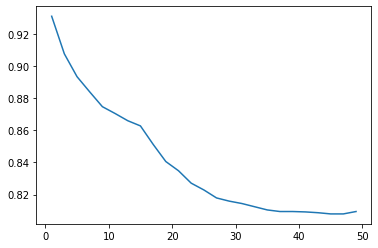

In [10]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1,50,2), grid_search.cv_results_['mean_test_score']);

O melhor valor para a acurácia foi de 0.93 com K=1. O gráfico acima mostra como o valor da acurácia é influenciado pelo valor do K. Nota-se que há uma relação inversa do número de vizinhos com a acurácia, indicando que para este modelo, é desejável que se tenha o menor valor de K possível para melhores resultados do modelo.

**2.2) Aplicando o Random:** Neste caso, apenas uma amostra de todo o conjunto de dados será utilizada para fazer os cálculos dos melhores parâmetros. Não necessariamente o modelo Grid apresentará melhor resultado que o Random, como pode ser observado abaixo:

In [11]:
#Fazendo a tunagem com o Random:

random_search = RandomizedSearchCV(modelo, param_distributions = parametros,
                                   scoring = 'accuracy',
                                   cv = validacao,
                                   verbose = 1,
                                   n_iter = 10,
                                   n_jobs = -1)

random_search.fit(x,y)

Fitting 30 folds for each of 10 candidates, totalling 300 fits


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=None),
                   estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])},
                   scoring='accuracy', verbose=1)

In [13]:
random_search.cv_results_['mean_test_score']

array([0.86672652, 0.80817716, 0.88217372, 0.86075263, 0.8527756 ,
       0.86922156, 0.8403116 , 0.80718026, 0.8089253 , 0.81939363])

In [14]:
random_search.best_score_

0.8821737178767817

In [15]:
random_search.best_params_

{'n_neighbors': 7}

Neste caso, o valor da acurácia foi de 0,88 e o K = 7. O número de fits foi de 300, o que resultou num tempo mais curto para rodar o modelo.

Abaixo, tem-se a definição da função Tunagem:

In [20]:
def Tunagem (modelo, treino, targets, parametros, tipo = 'grid', metrica = 'accuracy', n_iter = 20):

    validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)

    if tipo == 'grid':
        search = GridSearchCV(modelo, param_grid=parametros, 
                              scoring = metrica, cv = validacao,
                              verbose = 1, n_jobs = -1)
        
    elif tipo == 'random':
        search = RandomizedSearchCV(modelo, param_distributions=parametros, 
                              scoring = metrica, cv = validacao,
                              n_iter = n_iter, verbose = 1, n_jobs = -1)
          
    else: 
        print('Entrada inválida no argumento "tipo"')

    search.fit(treino, targets)    

    melhor = search.best_estimator_

    print('\nAcuracia: {:.4f}'.format(search.best_score_))
    print('Melhores parâmetros: {}\n'.format(search.best_params_))   

    return melhor   

Abaixo, tem-se o modelo KNN, Random e 20 repetições, conforme definido anteriormente na função Tunagem:

In [22]:
parametros = { 'n_neighbors': np.arange (1,50,2) }

modelo = KNeighborsClassifier()

knn = Tunagem(modelo, x, y, parametros, tipo = 'random')

Fitting 30 folds for each of 20 candidates, totalling 600 fits

Acuracia: 0.9332
Melhores parâmetros: {'n_neighbors': 1}



A acurácia obtida foi de 0.9332 e K = 1. Houve uma melhora na acurácia ao se aumentar o n_iter de 10 para 20, utilizando-se o Random.

In [23]:
np.arange(2,21,2)

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

**3) Árvore de Decisão:** Para este modelo, é importante definir alguns parâmetros, como n_iter.

In [24]:
parametros = {
              'max_depth': np.arange(1,11),
              'min_samples_split':np.arange(2,21,2),
              'min_samples_leaf':np.arange(1,11),
                  }

modelo = DecisionTreeClassifier()

arvore = Tunagem(modelo, x, y, parametros, tipo = 'random', n_iter = 50)

arvore

Fitting 30 folds for each of 50 candidates, totalling 1500 fits

Acuracia: 0.9661
Melhores parâmetros: {'min_samples_split': 14, 'min_samples_leaf': 4, 'max_depth': 8}



DecisionTreeClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=14)

Os resultados obtidos mostraram que a acurácia para o modelo de Árvore de Decisão foi de 0.9661, valor superior ao do KNN.
Os parâmetros que levaram a este resultado foram:

min_samples_split=14

min_samples_leaf=4

max_depth=8

**4) Random Forest:**

In [26]:
parametros = {
                'n_estimators': [50, 100, 150],
                'max_features' : [2,3,4,5],
                'bootstrap': [True, False],
                'max_depth': [2,4,6,8,10],
                'min_samples_split': [2,5,10],
                'min_samples_leaf': [1,3,5]
                }

modelo = RandomForestClassifier()

rf = Tunagem(modelo, x, y, parametros, tipo = 'random', n_iter = 5)
rf

Fitting 30 folds for each of 5 candidates, totalling 150 fits

Acuracia: 0.9611
Melhores parâmetros: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 4, 'max_depth': 8, 'bootstrap': True}



RandomForestClassifier(max_depth=8, max_features=4, min_samples_leaf=3,
                       min_samples_split=5)

O valor da acurácia obtida pela Random Forest foi de 0.9611, valor similar ao da Árvore de Decisão. 
Os parâmetros que levaram a este resultado foram:

n_estimators': 100

min_samples_split': 5

min_samples_leaf': 3

min_samples_leaf': 3

min_samples_leaf': 3

min_samples_leaf': 3

Apesar da Random Forest ser um modelo mais robusto, não necessariamente irá ser obtido um valor melhor da acurácia. Neste caso, a utilização da Árvore de Decisão obteve um resultado satisfatório e utilizar a Random Forest não é interessante, mesmo porque para este modelo é necessário um maior tempo de processamento dos dados. Ademais, é necessário mais memória no computador, no caso de não rodar o modelo em nuvem.

**5) Conclusão:**

Foi avaliada a tunagem de parâmetros para os dados de Custos Médicos. Foram analisados os modelos KNN, Árvore de Decisão e Random Forest.
Também foi analisada a diferença do Grid e do Random na tunagem, e o modelo Random conseguiu obter valores de acurácia satisfatórios. 

A vantagem de utilizar o Random é que o modelo roda em um tempo muito inferior ao Grid, por utilizar uma amostra e não todo o conjunto de variáveis estimadas. Além disso, não é necessário ter tanta memória para rodar o modelo (no caso de não se estar fazendo a modelagem em abiente em nuvem).

Os melhores valores de acurácia obtidos foram da Árvore de Decisão e do Random Forest, sendo que a diferença no valor da acurácia entre os modelos foi pequena. Deste modo, utilizar a Árvore de Decisão é mais viável, haja vista que por ser um modelo mais simples, há maior rapidez em rodar o modelo e há ocupação de menor espaço da memória do computador.